# Gender and user type who use the bike share system the most with the time and day 
## Sheriff Francis Doe Kumadoe


## Investigation Overview


> For the presentation, I'm interested in the gender that patronized the Bike Share system the most
and if it depends on whether they were subscribers or customers. When the most trips were taken in terms of time 
and the day. How long the average trip takes(duration_sec) for each time and day. 






## Dataset Overview

> The dataset contains 183412 observations and 12 attributes. Most of the variables are categorical(nominal) in nature with a few being objects and strings. The only ordinal Categorical data type is member birth year. There is only one numeric datatype which is the distance covered in seconds(duration_sec).
> - For member_gender : male, female, Other(non-binary)
- For start seasons : morning(6am-11:59am), afternoon(12-3:59pm), evening(4pm-7:59pm), night(8pm-12am), dawn(1am-5:59am)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
Bike_Share = pd.read_csv('201902-fordgobike-tripdata_clean.csv')

## Member Gender Count

> The Bike Share system is used mostlty by males, followed by females and finally the other which comprise of non-binary gender types. The males count was 139216, the females were 41144 and the non-binary(Others) was 3952.



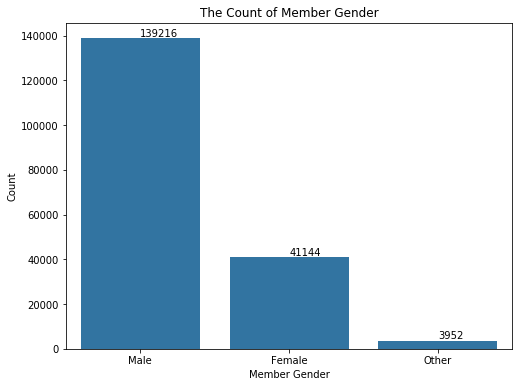

In [3]:

plt.figure(figsize=[8,6]) 
base_color= sb.color_palette()[0]
type_count =Bike_Share['member_gender'].value_counts()
type_order = type_count.index
sb.countplot(data= Bike_Share, x='member_gender',color = base_color,order= type_order)
plt.xlabel('Member Gender')
plt.ylabel('Count')
plt.title('The Count of Member Gender')
for i in range(type_count.shape[0]):
    count=type_count[i]
    plt.text(i,count,count+300,va = 'bottom' )
    

## Member Gender against User Type

> The subscribers in all three gender classes are more than the number of customers from all three gender classes. This is because the majority of users are subscribers. Just a few relative to subscribers were customers.

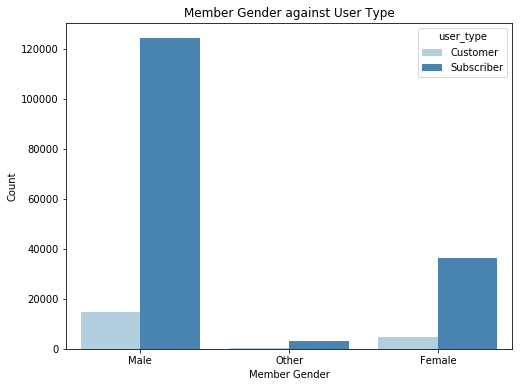

In [4]:
plt.figure(figsize=[8,6])

sb.countplot(data = Bike_Share, x = 'member_gender', hue = 'user_type', palette = 'Blues');
plt.xlabel('Member Gender')
plt.ylabel('Count')
plt.title('Member Gender against User Type');


## Counts of Start Days and Start Times

> Users of the Bike Share System mostly use the bikes on weekdays with thursday being the day with the most start trips of 35497 and Tuesday having 32113 start trips. Start trips are relatively the least on weekends with Sunday having 15823 starts trips and Saturday having 15705 start trips.
For the time of the day, majority of the trips begun in the morning(67606) and evening(63041). With the least trips starting at dawn(2534) followed by night(16830).

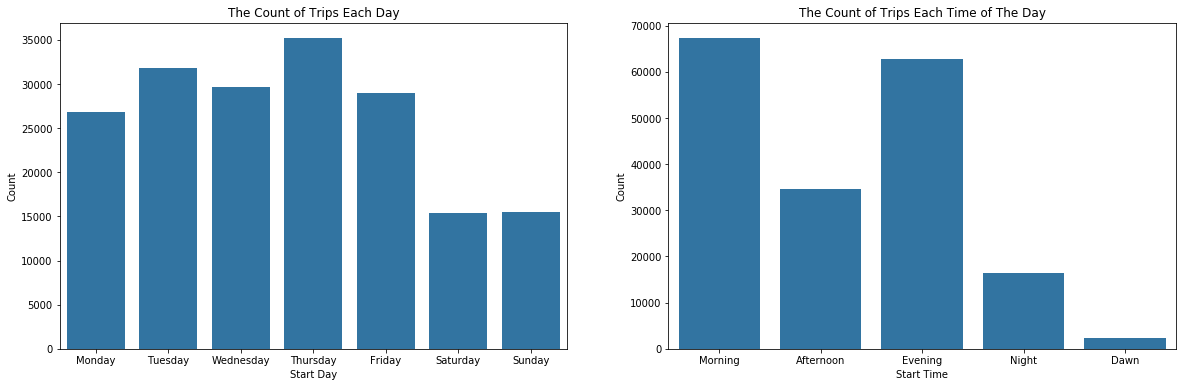

In [5]:
plt.figure(figsize=[20,6]) 
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
time_order = ['Morning','Afternoon','Evening','Night','Dawn']

plt.subplot(1,2,1)
base_color= sb.color_palette()[0]
type_count =Bike_Share['start_day'].value_counts()
type_order = type_count.index
sb.countplot(data= Bike_Share, x='start_day',color = base_color,order= day_order)
plt.xlabel('Start Day')
plt.ylabel('Count')
plt.title('The Count of Trips Each Day')

plt.subplot(1,2,2)
base_color= sb.color_palette()[0]
type_count =Bike_Share['start_seasons'].value_counts()
type_order = type_count.index
sb.countplot(data= Bike_Share, x='start_seasons',color = base_color,order= time_order)
plt.xlabel('Start Time')
plt.ylabel('Count')
plt.title('The Count of Trips Each Time of The Day');


## Relationship Between Start day, Start time, and Duration(secs)

It was surprising to know that the categories with the least count had the greatest mean distance covered and the those with the greatest counts had the least mean distance covered in seconds.
This is why The the greatest mean distance was covered on the Dawn of Sundays(1064 secs) and the least mean distannce was covered on the Dawn of Tuesdays(628 secs).

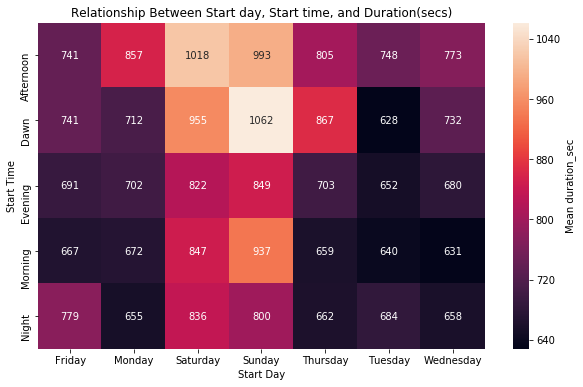

In [7]:
cat_meanss = Bike_Share.groupby(['start_day','start_seasons']).mean()['duration_sec']
cat_meanss = cat_meanss.reset_index(name = 'mean_distance')
cat_meanss = cat_meanss.pivot(index = 'start_seasons', columns ='start_day', values ='mean_distance')
plt.figure(figsize=[10,6])
sb.heatmap(cat_meanss, annot =True, fmt = '.0f', cbar_kws={'label':'Mean duration_sec'},);
plt.xlabel('Start Day')
plt.ylabel('Start Time')
plt.title('Relationship Between Start day, Start time, and Duration(secs)');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 383567 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
